#                             The Sparks Foundation Internship - Data Science 
Task 5 -- Exploratory Data Analysis - Indian Premier League
                                                                                                    
                                                                                                    
                                                                                                    Charulatha J

# Importing all necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load the datasets -- 1.matches.csv   2.deliveries.csv

In [2]:
data1 = pd.read_csv('matches.csv')

In [3]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data2 = pd.read_csv('deliveries.csv')

In [5]:
data2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
season_winner=data1[['id','season','winner']]

whole_data=data2.merge(season_winner,how='inner',left_on='match_id',right_on='id')

In [7]:
data1=data1.drop(columns=["umpire3"],axis=1)

In [8]:
data1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [9]:
#Printing the wins by teams in each season
wins_in_each_season=data1.groupby("season")["winner"].value_counts()
wins_in_each_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [10]:
winners=data1['winner']
print(winners)

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
4      Royal Challengers Bangalore
                  ...             
751                 Mumbai Indians
752                 Mumbai Indians
753                 Delhi Capitals
754            Chennai Super Kings
755                 Mumbai Indians
Name: winner, Length: 756, dtype: object


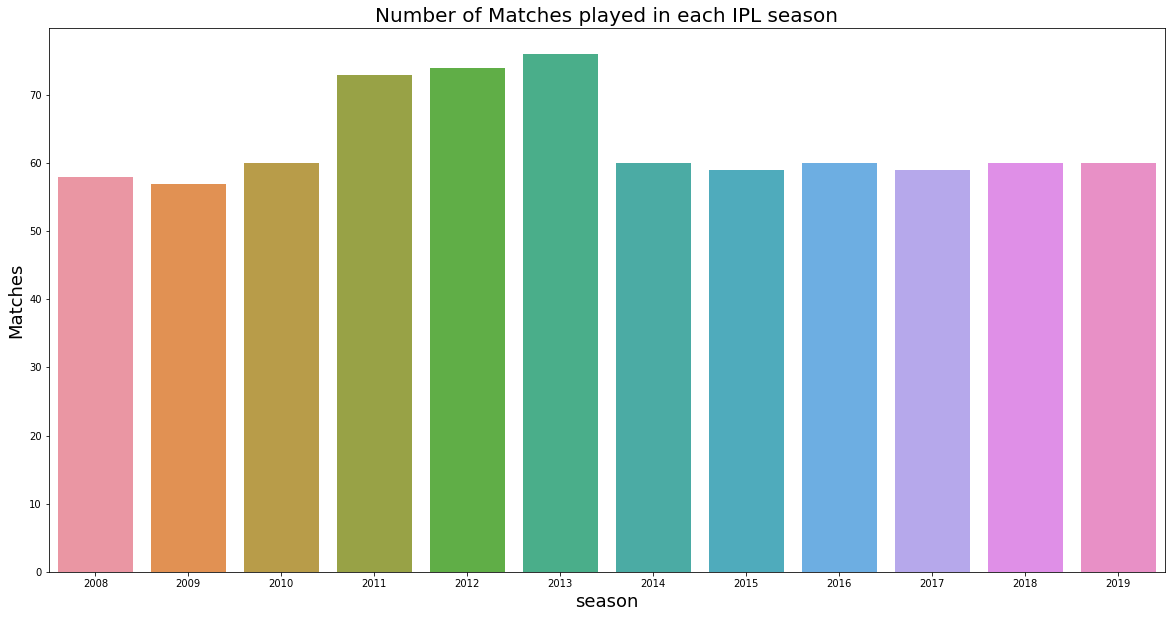

In [11]:
#Plot the number of matches played in each IPL season
plt.figure(figsize = (20,10))
sns.countplot('season',data=data1)
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=18)
plt.ylabel('Matches',fontsize=18)
plt.show()

Thus,Maximum number of matches is played in 2013 season

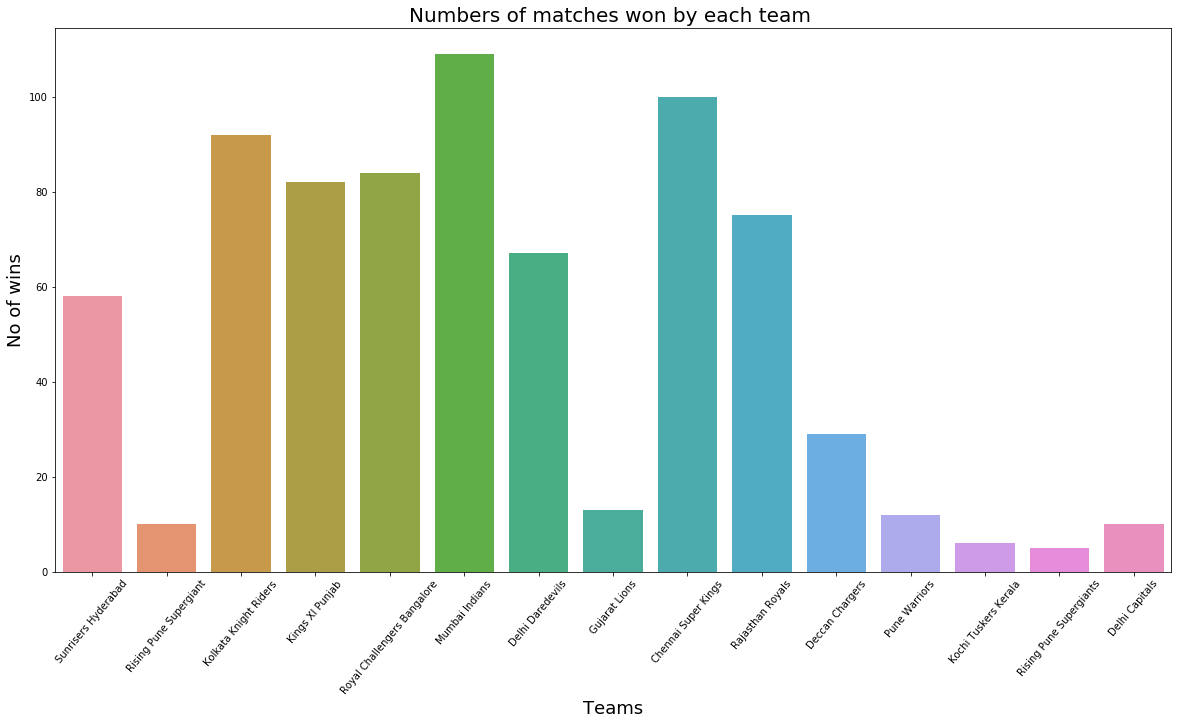

In [12]:
#Plot the number of matches won by each team
plt.figure(figsize = (20,10))
sns.countplot(x='winner',data=data1)
plt.title("Numbers of matches won by each team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=18)
plt.ylabel("No of wins",fontsize=18)
plt.show()

Thus, Mumbai Indians won most of the matches

In [13]:
data1['win_by']=np.where(data1['win_by_runs']>0,'Bat first','Bowl first')

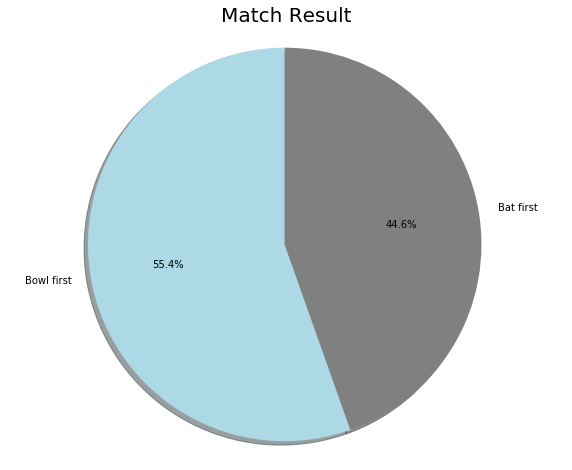

In [14]:
#PieChart for win percentage based on bowl first and bat first
Win=data1.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['lightblue', 'grey']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

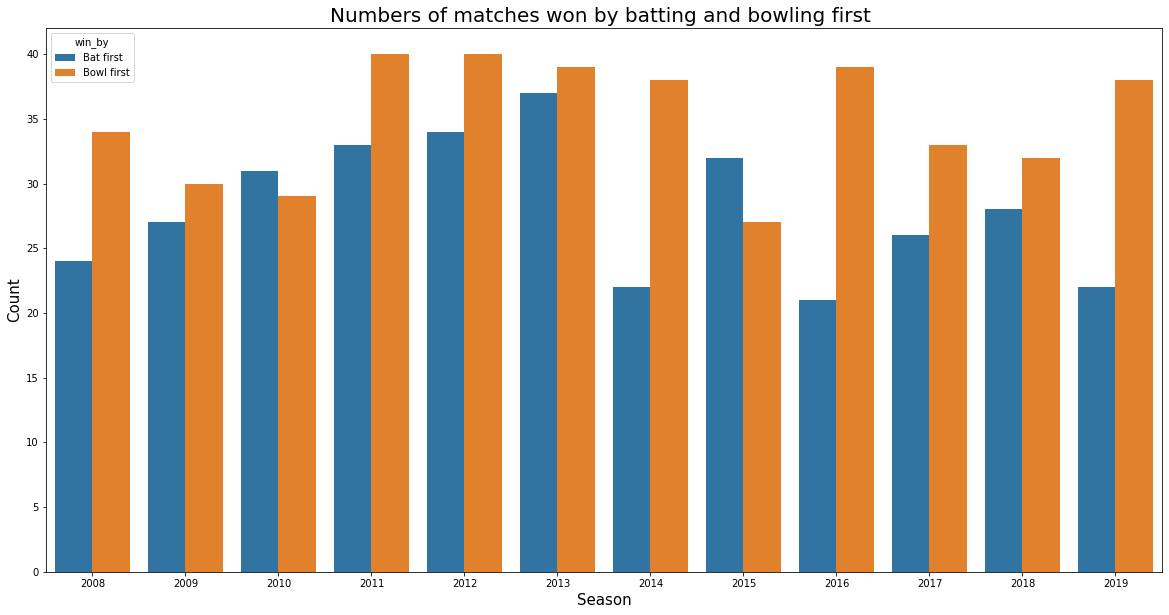

In [15]:
#Plot the number of matches won by batting and bowling first 
plt.figure(figsize = (20,10))
sns.countplot('season',hue='win_by',data=data1)
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

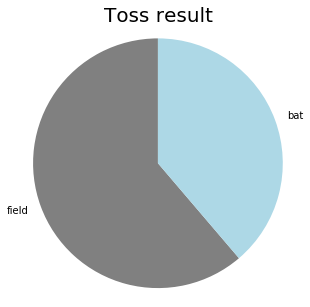

In [16]:
#Piechart for percentage of the toss decision(either to bat or bowl)
Toss=data1.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['grey', 'lightblue']
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, colors=colors,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()


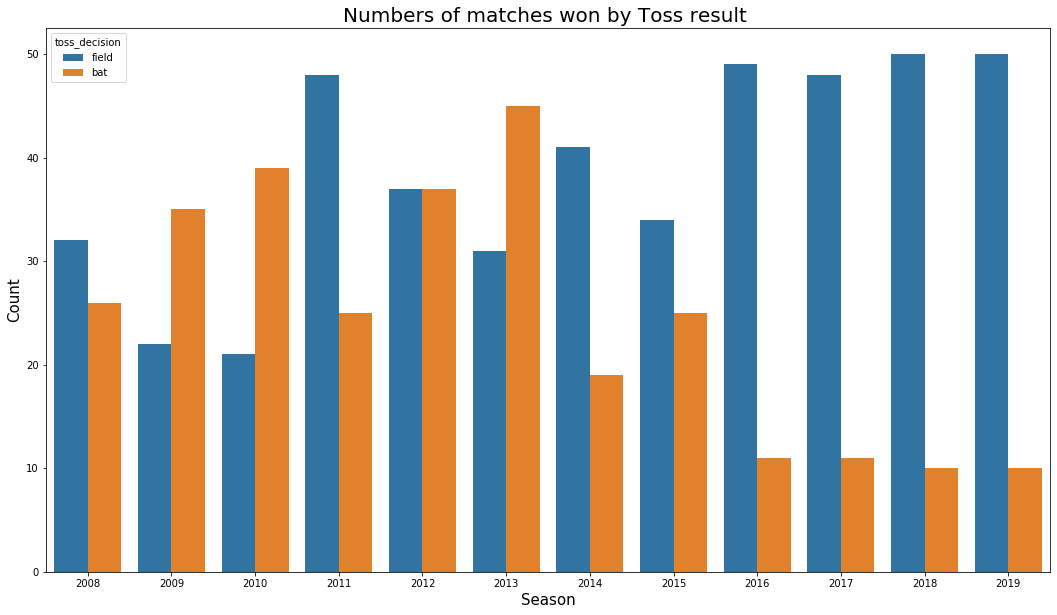

In [17]:
#Plot the number of matches won by toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=data1)
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()


In [18]:
#print winner season wise
final_matches=data1.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [19]:
#print number of seasons won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

Thus,Mumbai Indians won many times(4) in finals

<Figure size 1440x720 with 0 Axes>

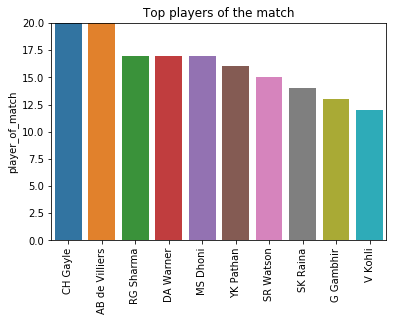

In [20]:
#print names of top player in IPL
plt.figure(figsize = (20,10))
top_players = data1.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top players of the match")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

In [21]:
#print the top 10 leading run scorer in IPL
batsman_score=data2.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Leading Run Scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 Leading Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


Thus, Virat Kohli scored most runs in IPL

In [22]:
#print no of matches played by batsman
No_Matches_player= data2[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(10)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


Thus, Raina played most matches in IPL

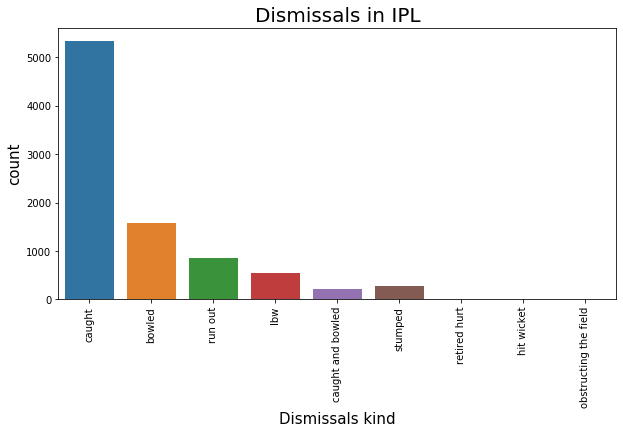

In [23]:
# Dismissals in IPL in each season
plt.figure(figsize=(10,5))
ax=sns.countplot(data2.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Thus, most dismissals in IPL is by caught

In [24]:
six_data=whole_data[whole_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


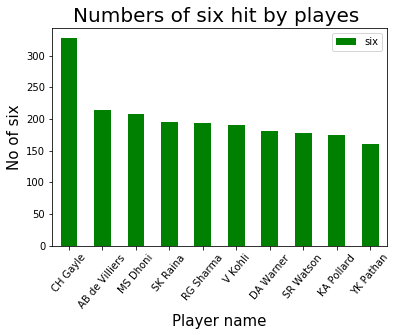

In [25]:
#plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

Thus,Chris Gayle hits more sixes in IPL

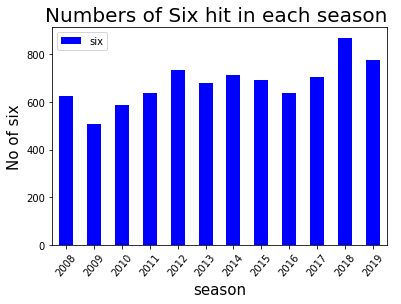

In [26]:
#plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'blue')
plt.title("Numbers of Six hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

In [27]:
wicket_data=data2.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [28]:
# print  most wicket taking bowlers in ipl
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


Thus, SL Malinga took most wickets in IPL

Thus,we performed "Exploratory Data Analysis" on dataset "Indian Premier League" 
Dataset: https://bit.ly/34SRn3b